# PROBLEM STATEMENT

* How accurately can we classify whether a sample from a body of water is potable or not potable, given its chemical and physical characteristics?

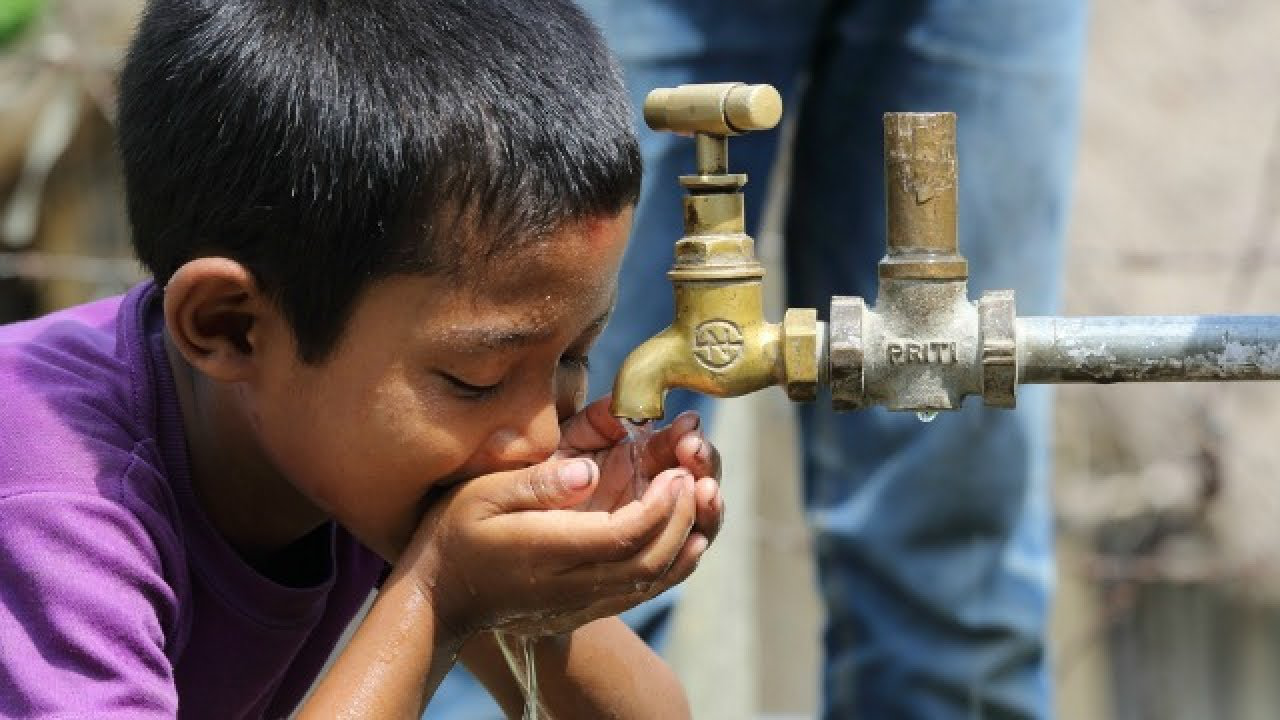

In [1]:
from PIL  import Image
img = Image.open('water_potability.jpg')
img

* The Below Columns Show For Better Understanding Of The Data

1.PH : Indicator of acidic or alkaline condition of water, ranging from 1 to 14.

Acceptable Limit: 6.5 to 8.5

2.Hardness : Capacity of water to precipitate soap in mg/L.

Acceptable Limit: Upto 500 or 600 mg/L

3.Solids : Total dissolved solids (TDS) in ppm. The water with high TDS value indicates that water is highly mineralized.

Acceptable Limit: 500 - 1000 ppm

4.Chloramines : Amount of Chloramines in ppm.

Acceptable Limit: Upto 4 ppm

5.Sulfate : Amount of Sulfates dissolved in water in mg/L.

Acceptable Limit: Upto 400 mg/L

6.Conductivity : Electrical conductivity of water in μS/cm.

Acceptable Limit: Upto 400 μS/cm

7.Organic_carbon : Amount of carbon in organic compounds in ppm.

Acceptable Limit: Less than 2 mg/L

8.Trihalomethanes: Amount of Trihalomethanes in μg/L.

Acceptable Limit: Upto 80 ppm

9.Turbidity: Measure of light emiting property of water in NTU.

Acceptable Limit: 5-10 NTU

10.Potability: Indicates if water is safe for human consumption.

Here Potable -1 and Not potable -0.



# DATA

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('water_potability.csv')

In [4]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [5]:
from math import floor,ceil
import tabulate as tb


In [6]:
l=[]
names=[]
for col in df.columns:
    names.append(col)
    l.append(f'{floor(df[col].min())} to {ceil(df[col].max())}')

tab = pd.DataFrame(list(zip(names,l)),columns =['Name', 'Range'])
print(tb.tabulate(tab, headers='keys', tablefmt='pretty'))

+---+-----------------+--------------+
|   |      Name       |    Range     |
+---+-----------------+--------------+
| 0 |       ph        |   0 to 14    |
| 1 |    Hardness     |  47 to 324   |
| 2 |     Solids      | 320 to 61228 |
| 3 |   Chloramines   |   0 to 14    |
| 4 |     Sulfate     |  129 to 482  |
| 5 |  Conductivity   |  181 to 754  |
| 6 | Organic_carbon  |   2 to 29    |
| 7 | Trihalomethanes |   0 to 124   |
| 8 |    Turbidity    |    1 to 7    |
| 9 |   Potability    |    0 to 1    |
+---+-----------------+--------------+


# EDA

# Handling Missing Values and Duplicates


In [7]:
import missingno as msno


<AxesSubplot:>

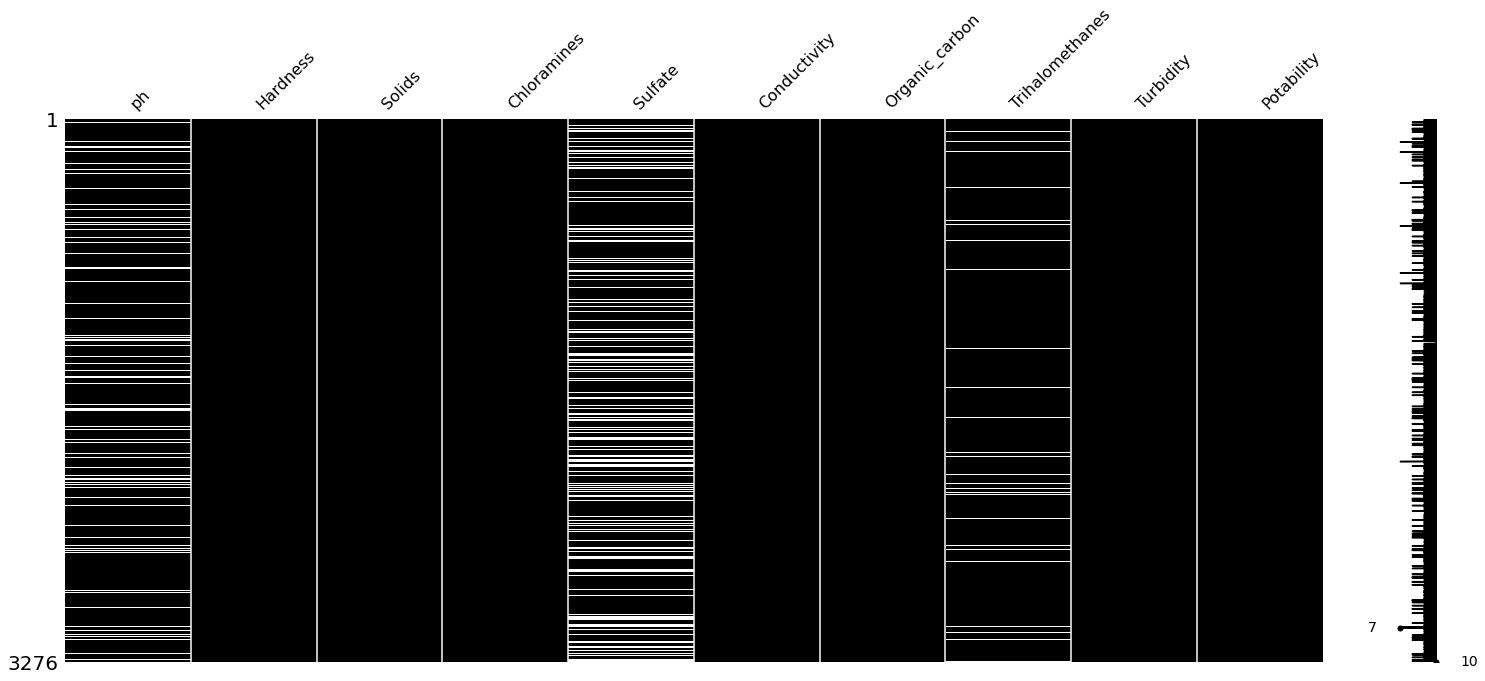

In [8]:
msno.matrix(df, color=(0, 0, 0))

In [9]:
df.isnull().sum()/len(df)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

* ph feature have almost 15% of data missing.
* Sulfate feature have almost 24% of data missing.
* Trihalomethanes feature have almost 5% missing data.

In [10]:
from sklearn.impute import KNNImputer

* Here we are using knn imputer to treat missing values.
* Why knn:it is much more accurate than the mean,median,mode and other imputation methods.
* Why not mean/median/mode: it can introduce bias in the data.

In [11]:
imputer = KNNImputer(n_neighbors=5, weights="uniform",add_indicator=False)


In [12]:
data=imputer.fit_transform(df)


In [13]:
new=pd.DataFrame(data,columns=df.columns)

In [14]:
new.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.156857  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  336.094350    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  330.449166    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436524       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0

<AxesSubplot:>

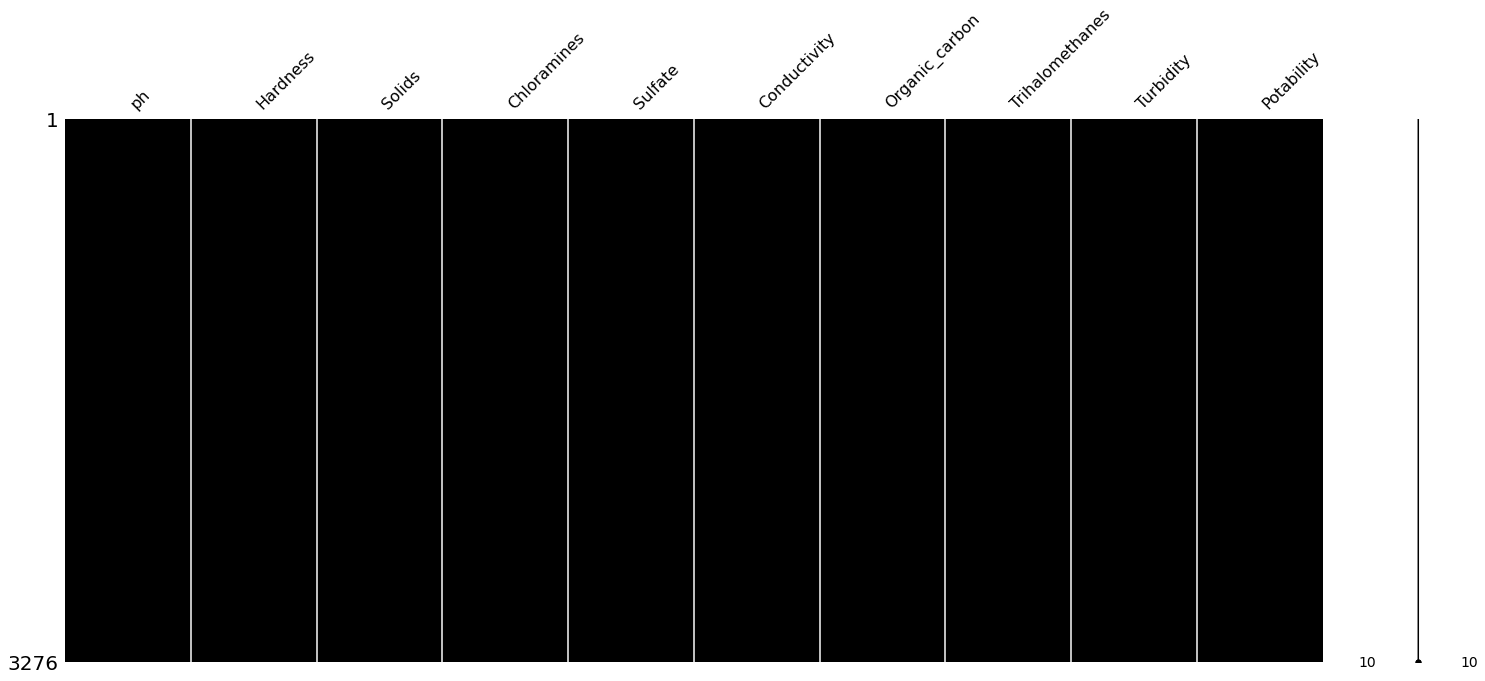

In [15]:
msno.matrix(new, color=(0, 0, 0))

* There Are No Null Values.

In [16]:
new[new.duplicated()]

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []

* There Are No Duplicated Values

# Visuvalization

In [17]:
import seaborn as sns

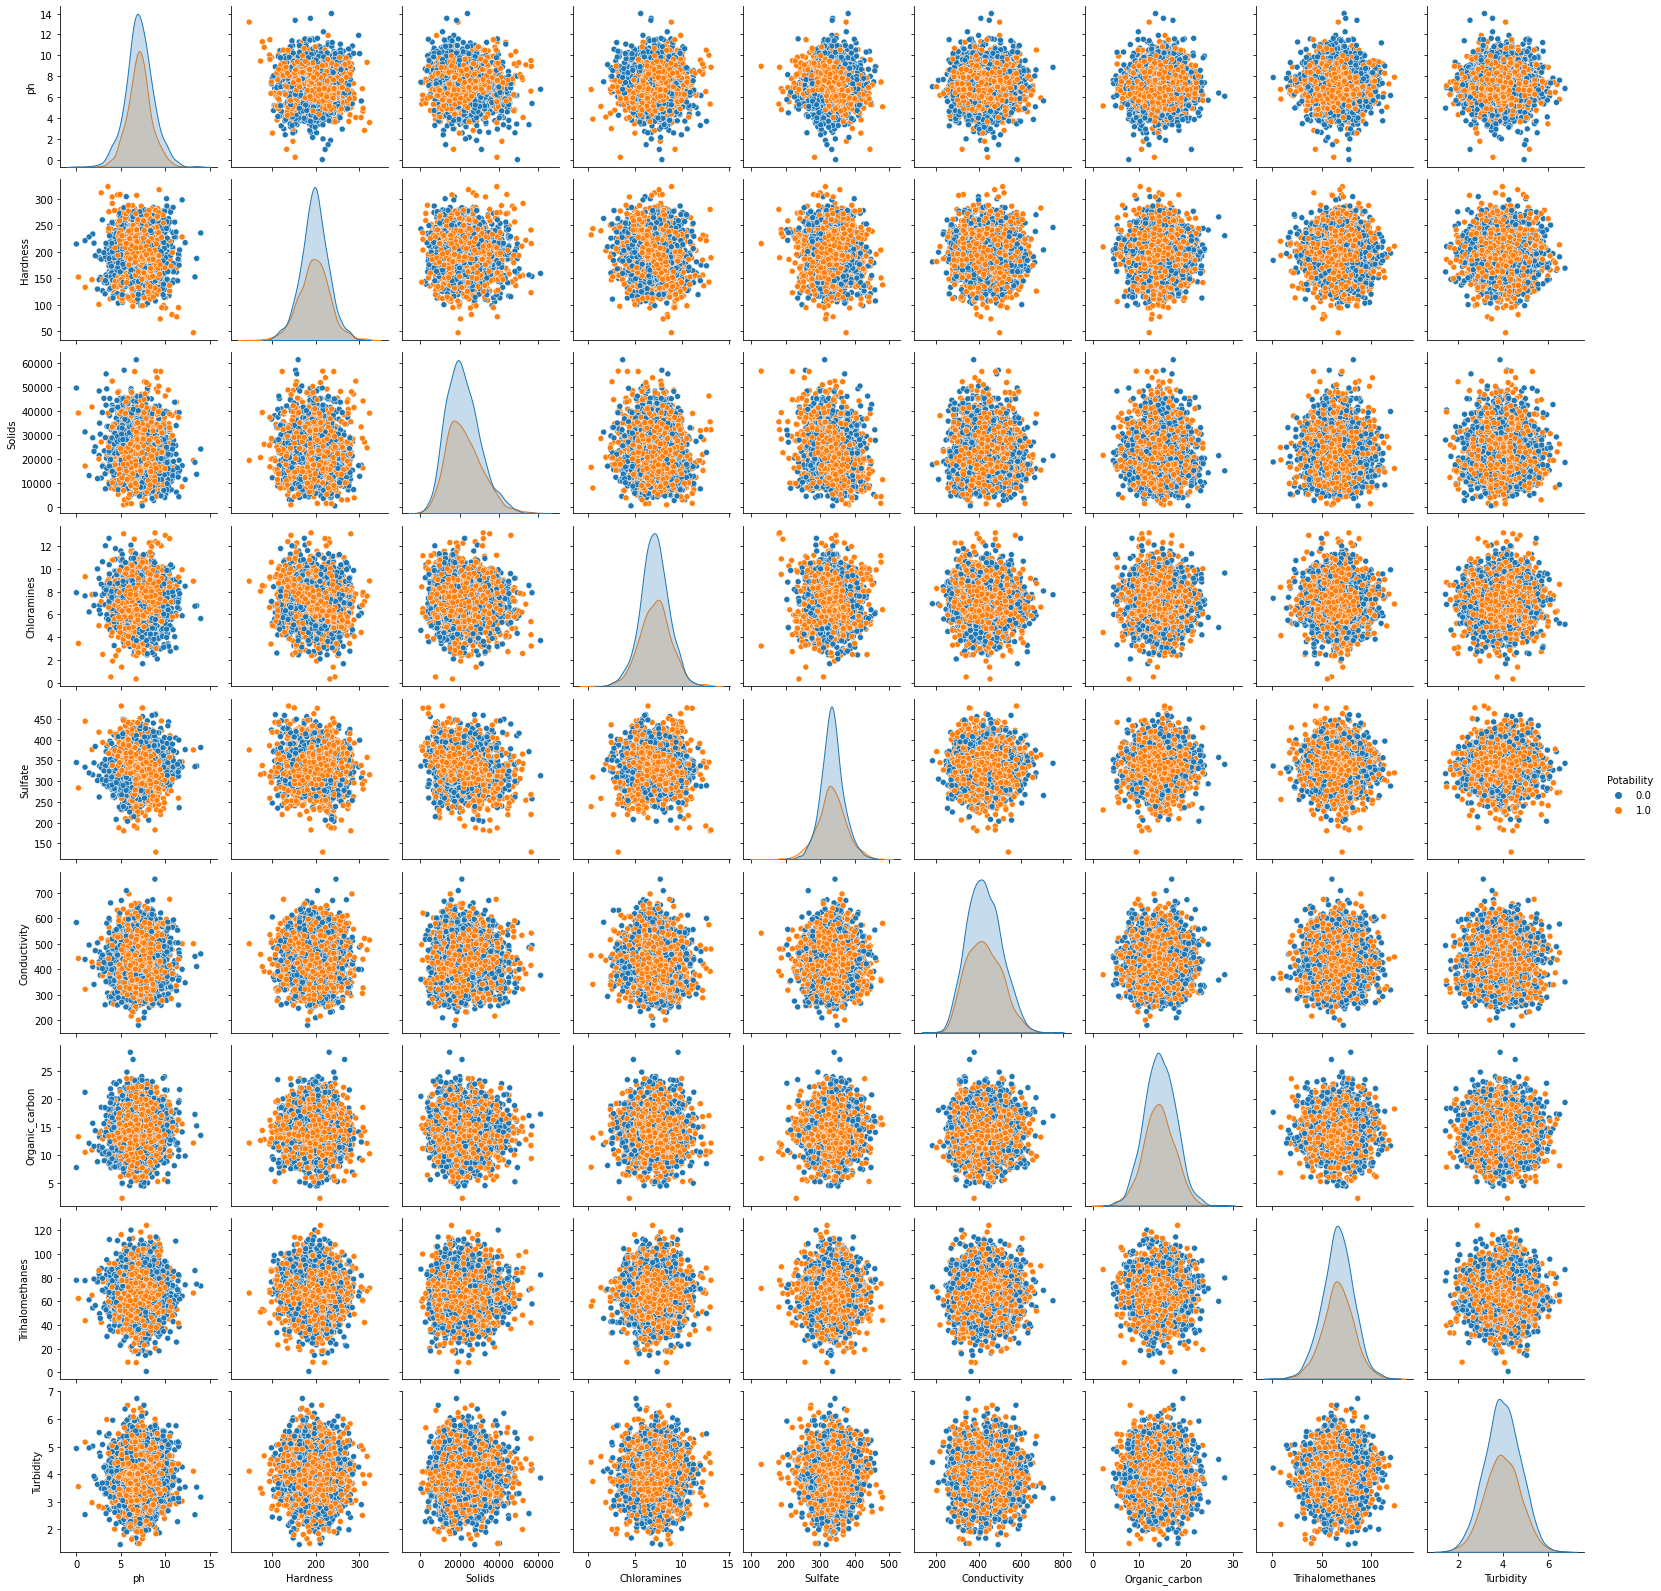

In [18]:
sns.pairplot(new,hue='Potability')

# Stats of data

In [19]:
new.describe().round(2).style.background_gradient(cmap='Blues')

In [20]:
import plotly.express as px


In [21]:
d = pd.DataFrame(new["Potability"].value_counts())
fig = px.pie(d, 
             values = "Potability", 
             names = ["Not Potable", "Potable"], 
             hole = 0.5, 
             opacity = 1.0, 
             labels = {"label" : "Potability", "Potability" : "Number of Samples"})

fig.update_layout(title = dict(text = "Pie Chart of Potability"))
fig.update_traces(textposition = "inside", textinfo = "percent+label")
fig.show()


In [22]:
d=new['Potability'].value_counts()
print(d)
print("1 means potable")
print("0 means Not potable")

0.0    1998
1.0    1278
Name: Potability, dtype: int64
1 means potable
0 means Not potable


# Skewness 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

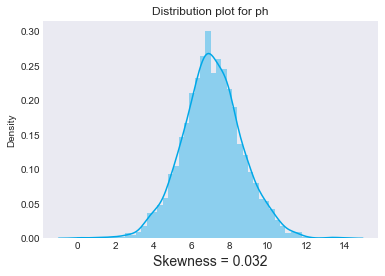

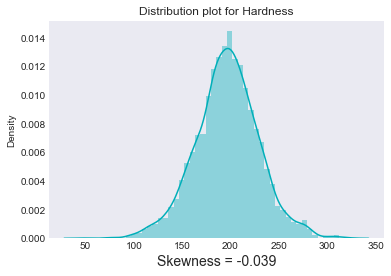

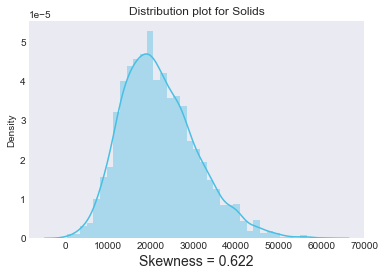

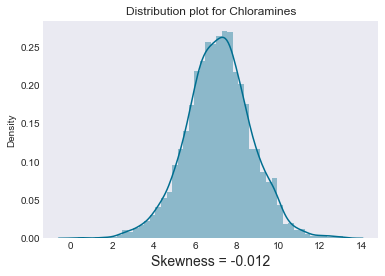

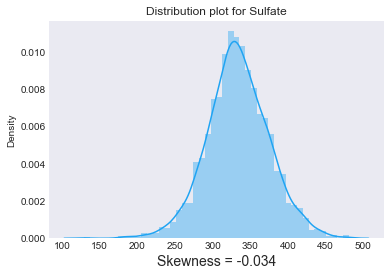

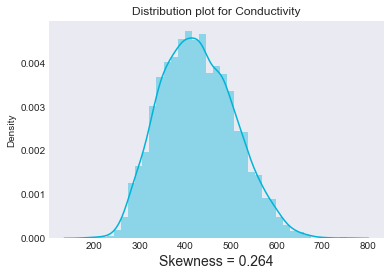

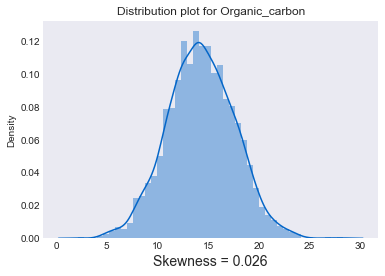

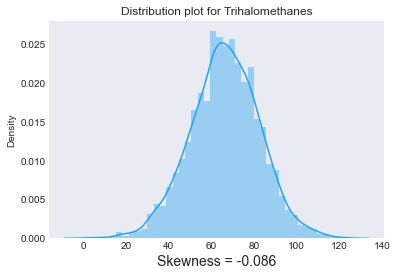

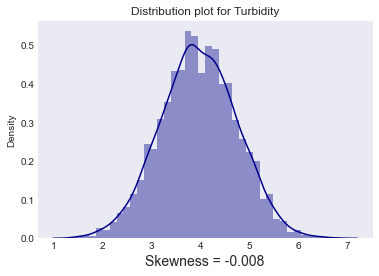

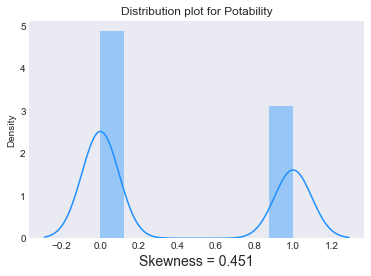

In [24]:
plt.style.use('seaborn-dark')
colors=['#00a8e8', '#00afb9',  '#48bfe3', '#006e90', '#20a4f3', '#00b4d8', '#0466c8', '#20a4f3', '#00008B','#1E90FF']
i=0
while i<10:
    for col in new.columns:
        plt.figure(figsize=(6,4))
        sns.distplot(df[col],color=colors[i])
        plt.title(f'Distribution plot for {col}')
        plt.xlabel(f'Skewness = {round(new[col].skew(),3)}',fontsize=14)
        i+=1
        plt.show()

# Correlation

<AxesSubplot:>

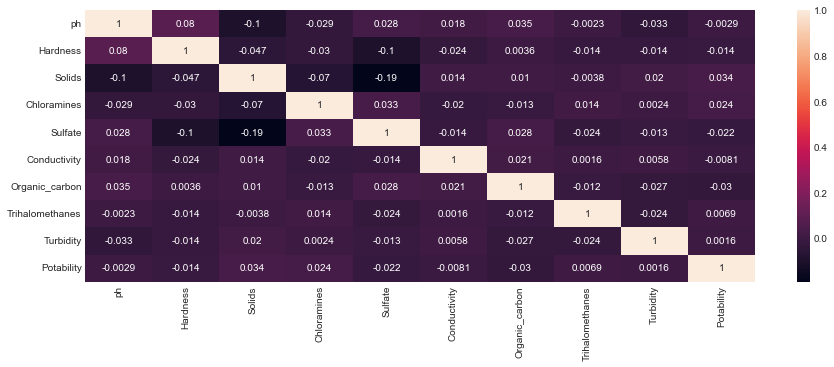

In [25]:
plt.figure(figsize=(15, 5))
sns.heatmap(new.corr(),annot=True)


In [26]:
corr_matrix = new.corr()

In [27]:
 corr_matrix["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006918
Turbidity          0.001581
ph                -0.002920
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.022108
Organic_carbon    -0.030001
Name: Potability, dtype: float64

* The correlation coefficient ranges from –1 to 1.
* When it is close to 1, it means that there is a strong positive correlation.
* When it is close to -1, it means that there is a negative correlation.


# Relationship Between Each Variable and Target Variable (Potability)


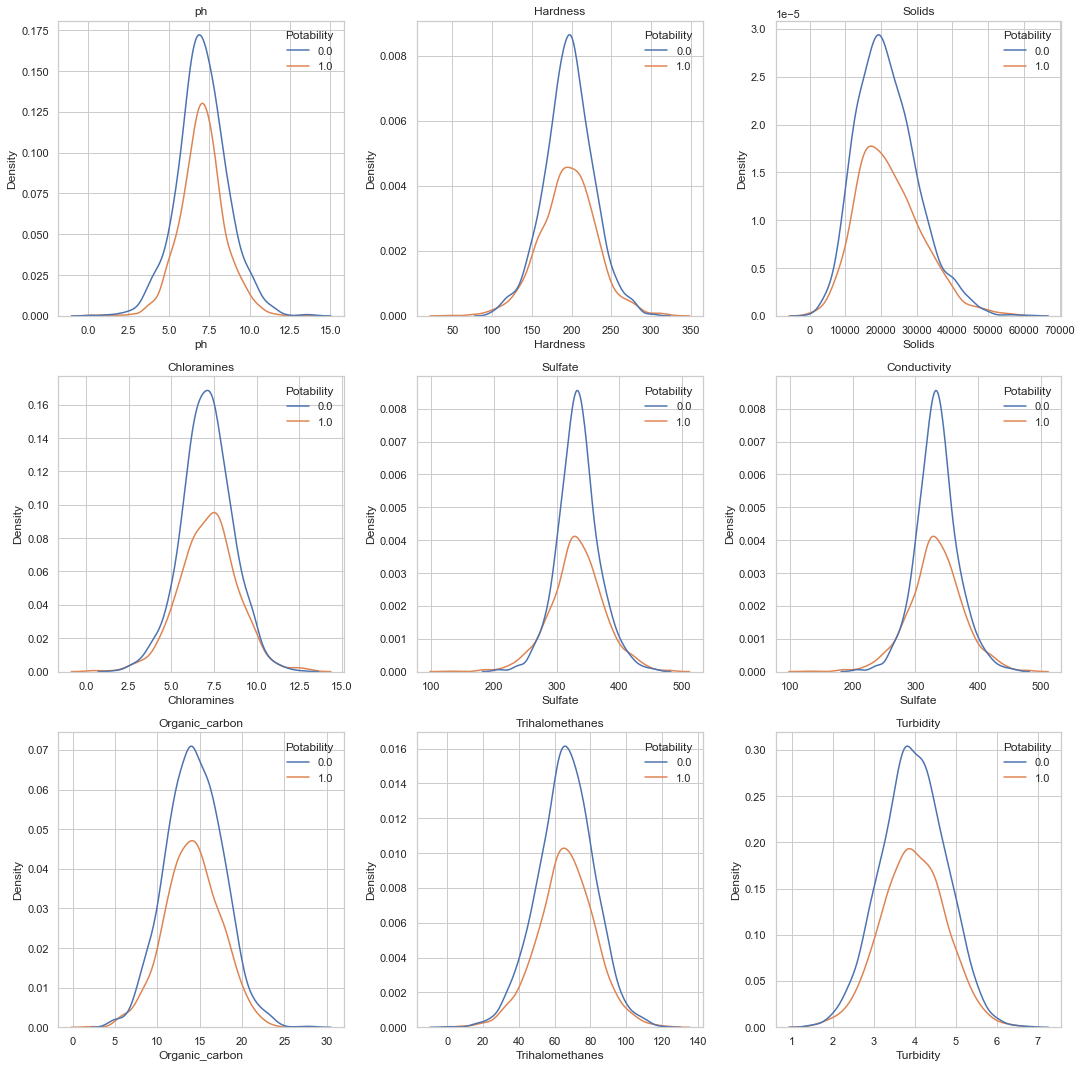

In [28]:
sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=new['ph'],hue = new['Potability'])

plt.subplot(3,3,2)
plt.title('Hardness')
sns.kdeplot(x=new['Hardness'],hue = new['Potability'])

plt.subplot(3,3,3)
plt.title('Solids')
sns.kdeplot(x=new['Solids'],hue = new['Potability'])

plt.subplot(3,3,4)
plt.title('Chloramines')
sns.kdeplot(x=new['Chloramines'],hue = new['Potability'])

plt.subplot(3,3,5)
plt.title('Sulfate')
sns.kdeplot(x=new['Sulfate'],hue = new['Potability'])

plt.subplot(3,3,6)
plt.title('Conductivity')
sns.kdeplot(x=new['Sulfate'],hue = new['Potability'])

plt.subplot(3,3,7)
plt.title('Organic_carbon')
sns.kdeplot(x=new['Organic_carbon'],hue = new['Potability'])

plt.subplot(3,3,8)
plt.title('Trihalomethanes')
sns.kdeplot(x=new['Trihalomethanes'],hue = new['Potability'])

plt.subplot(3,3,9)
plt.title('Turbidity')
sns.kdeplot(x=new['Turbidity'],hue = new['Potability'])

plt.tight_layout()

# Outliers

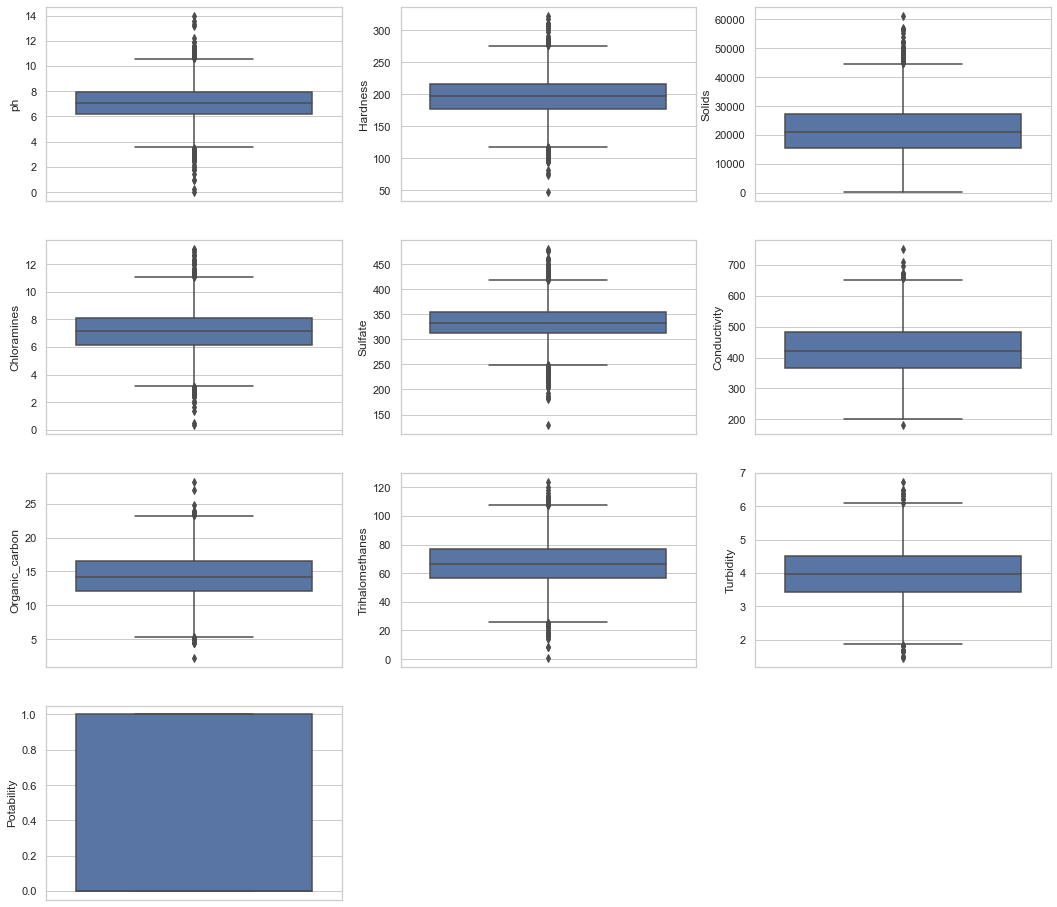

In [29]:
i=1
plt.figure(figsize=(18,25))
for feature in new.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=new[feature])
    i+=1

* There are some outliers

In [30]:
new.shape

(3276, 10)

# SCALING

* I choose to use StandardScaler because the distribution is fairly close to a normal distribution.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = new.drop('Potability', axis=1)
y = new.Potability

In [33]:
X

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.156857  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  336.094350   
2     8.099124  224.236259  19909.541732     9.275884  330.449166   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  364.091541   
3273  9.419510  175.762646  33155.578218     7.350233  327.357588   
3274  5.126763  230.603758  11983.869376     6.303357  325.952434   
3275  7.874671  195.102299  17404.177061     7.509306  345.728295   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        64.327280   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [36]:
X_train

array([[0.56140511, 0.55105395, 0.18101919, ..., 0.6339327 , 0.50387526,
        0.42519848],
       [0.50232409, 0.52586175, 0.41275496, ..., 0.5827978 , 0.4674768 ,
        0.39585863],
       [0.4591588 , 0.5147419 , 0.24356459, ..., 0.39364007, 0.65428723,
        0.38570656],
       ...,
       [0.2716466 , 0.50804776, 0.37405794, ..., 0.32007749, 0.54127128,
        0.57290765],
       [0.48292249, 0.60649784, 0.34330611, ..., 0.64755422, 0.73153187,
        0.58184239],
       [0.56271397, 0.23966128, 0.60680446, ..., 0.5978395 , 0.3909651 ,
        0.44047049]])

In [37]:
y_train

925     0.0
3110    0.0
2287    0.0
1323    0.0
2244    0.0
       ... 
1164    1.0
500     0.0
2989    0.0
421     0.0
1829    0.0
Name: Potability, Length: 2457, dtype: float64

# Model Evaluation

# 1. Logistic Rgression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [42]:
confusion_matrix(y_test,y_pred)

array([[504,   0],
       [311,   4]], dtype=int64)

In [43]:
print(accuracy_score(y_test,y_pred))

0.6202686202686203


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       504
         1.0       1.00      0.01      0.03       315

    accuracy                           0.62       819
   macro avg       0.81      0.51      0.39       819
weighted avg       0.77      0.62      0.48       819



# 2. SVC

In [45]:
from sklearn.svm import SVC


In [46]:
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(X_train,y_train)

SVC()

In [47]:
y_pred = svc_classifier.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred)

array([[435,  69],
       [193, 122]], dtype=int64)

In [49]:
print(accuracy_score(y_test,y_pred))

0.6800976800976801


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.86      0.77       504
         1.0       0.64      0.39      0.48       315

    accuracy                           0.68       819
   macro avg       0.67      0.63      0.63       819
weighted avg       0.67      0.68      0.66       819



# 3.KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn.predict(X_test)

In [55]:
confusion_matrix(y_test,y_pred)

array([[381, 123],
       [172, 143]], dtype=int64)

In [56]:
print(accuracy_score(y_test,y_pred))

0.6398046398046398


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       504
         1.0       0.54      0.45      0.49       315

    accuracy                           0.64       819
   macro avg       0.61      0.60      0.61       819
weighted avg       0.63      0.64      0.63       819



# 4.Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred = decision_tree.predict(X_test)

In [61]:
confusion_matrix(y_test,y_pred)

array([[296, 208],
       [153, 162]], dtype=int64)

In [62]:
print(accuracy_score(y_test,y_pred))

0.5592185592185592


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62       504
         1.0       0.44      0.51      0.47       315

    accuracy                           0.56       819
   macro avg       0.55      0.55      0.55       819
weighted avg       0.57      0.56      0.56       819



# 5. Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier


In [65]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)


RandomForestClassifier()

In [66]:
y_pred = random_forest.predict(X_test)

In [67]:
confusion_matrix(y_test,y_pred)

array([[379, 125],
       [163, 152]], dtype=int64)

In [68]:
print(accuracy_score(y_test,y_pred))

0.6483516483516484


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.72       504
         1.0       0.55      0.48      0.51       315

    accuracy                           0.65       819
   macro avg       0.62      0.62      0.62       819
weighted avg       0.64      0.65      0.64       819



# 6.ADA Boost

In [70]:
from sklearn.ensemble import AdaBoostClassifier 


In [71]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)


AdaBoostClassifier()

In [72]:
y_pred = ada.predict(X_test)

In [73]:
confusion_matrix(y_test,y_pred)

array([[383, 121],
       [215, 100]], dtype=int64)

In [74]:
print(accuracy_score(y_test,y_pred))

0.5897435897435898


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.76      0.70       504
         1.0       0.45      0.32      0.37       315

    accuracy                           0.59       819
   macro avg       0.55      0.54      0.53       819
weighted avg       0.57      0.59      0.57       819



# 7.XG Boost

In [76]:
from xgboost.sklearn import XGBClassifier


In [77]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [78]:
y_pred = xg.predict(X_test)

In [79]:
confusion_matrix(y_test,y_pred)

array([[363, 141],
       [149, 166]], dtype=int64)

In [80]:
print(accuracy_score(y_test,y_pred))

0.645909645909646


In [81]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71       504
         1.0       0.54      0.53      0.53       315

    accuracy                           0.65       819
   macro avg       0.62      0.62      0.62       819
weighted avg       0.64      0.65      0.65       819



* AS We seen above models does not performing high accurcy, then we do hyperparameter tuning

# Hyperparameter Tuning Using GridSeacrhCV


# 1.Logistic regression

In [82]:
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV


In [83]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [84]:
logreg = LogisticRegression()


In [85]:
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)


In [86]:
logreg_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.6121264053781068


# 2. KNN

In [87]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


In [88]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [89]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [90]:
# find the best score
g_res.best_score_

0.6328856328856328

In [91]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}

In [92]:
g_res = KNeighborsClassifier(n_neighbors = 13, metric =  'manhattan',weights = 'distance')

In [93]:
g_res.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')

In [94]:
y_pred = g_res.predict(X_test)

In [95]:
confusion_matrix(y_test,y_pred)

array([[414,  90],
       [201, 114]], dtype=int64)

In [96]:
print(accuracy_score(y_test,y_pred))

0.6446886446886447


In [97]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74       504
         1.0       0.56      0.36      0.44       315

    accuracy                           0.64       819
   macro avg       0.62      0.59      0.59       819
weighted avg       0.63      0.64      0.62       819



# 3. SVM

In [98]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.608 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.630 total time=   2.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.682 total time=   2.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.631 total time=   2.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.662 total time=   2.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.669 total time=   0.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.652 total time=   1.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.695 total time=   0.9s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.631 total time=   0.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.648 total time=   0.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.608 total time=   0.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.608 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.609 total time=   0.6s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [99]:
grid.best_score_

0.6589323265941418

In [100]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [101]:
svc_classifier = SVC(C= 1000, gamma=1,kernel = 'rbf')
svc_classifier.fit(X_train,y_train)
 

SVC(C=1000, gamma=1)

In [102]:
y_pred = svc_classifier.predict(X_test)

In [103]:
confusion_matrix(y_test,y_pred)

array([[365, 139],
       [158, 157]], dtype=int64)

In [104]:
print(accuracy_score(y_test,y_pred))

0.6373626373626373


In [105]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71       504
         1.0       0.53      0.50      0.51       315

    accuracy                           0.64       819
   macro avg       0.61      0.61      0.61       819
weighted avg       0.63      0.64      0.64       819



# 4. Decision Tree

In [106]:
params = {
    'max_depth': [3,5,8,12,15],
    'min_samples_leaf': [5,8,12,15,20],
    'criterion': ["gini", "entropy"]
}

In [107]:
grid_search = GridSearchCV(estimator=decision_tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [108]:
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 12, 15],
                         'min_samples_leaf': [5, 8, 12, 15, 20]},
             scoring='accuracy', verbose=1)

In [109]:
grid_search.best_score_

0.6320780699663674

In [110]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 15}

In [111]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 12)


In [112]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=12)

In [113]:
y_pred = decision_tree.predict(X_test)

In [114]:
confusion_matrix(y_test,y_pred)

array([[418,  86],
       [214, 101]], dtype=int64)

In [115]:
print(accuracy_score(y_test,y_pred))

0.6336996336996337


In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       504
         1.0       0.54      0.32      0.40       315

    accuracy                           0.63       819
   macro avg       0.60      0.58      0.57       819
weighted avg       0.61      0.63      0.61       819



# 5. Random Forest

In [117]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [118]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [119]:
rf = RandomForestClassifier()

In [120]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [121]:
rf_grid.fit(X_train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [122]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.5,
 'n_estimators': 120}

In [123]:
rf_grid.best_score_

0.6666708062192639

In [124]:
rf= (RandomForestClassifier(max_depth=None,max_features=0.6,max_samples=0.5,n_estimators=100))
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6, max_samples=0.5)

In [125]:
y_pred = rf.predict(X_test)

In [126]:
confusion_matrix(y_test,y_pred)

array([[386, 118],
       [169, 146]], dtype=int64)

In [127]:
print(accuracy_score(y_test,y_pred))

0.6495726495726496


In [128]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       504
         1.0       0.55      0.46      0.50       315

    accuracy                           0.65       819
   macro avg       0.62      0.61      0.62       819
weighted avg       0.64      0.65      0.64       819



# 6.XG BOOST

In [129]:

    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }



In [130]:
    xg = XGBClassifier()

    gsearch = GridSearchCV(estimator = xg,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)



In [131]:
 gsearch.fit(X_train,y_train)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]},
             verbose=1)

In [132]:
gsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [133]:
gsearch.best_score_

0.6638219661219015

In [134]:
xgb = XGBClassifier(colsample_bytree= 0.7,
 learning_rate = 0.01,
 max_depth = 10,
 min_child_weight =  1,
 n_estimators = 500,
 subsample = 0.7)


In [135]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [136]:
y_pred = xgb.predict(X_test)

In [137]:
confusion_matrix(y_test,y_pred)

array([[394, 110],
       [175, 140]], dtype=int64)

In [138]:
print(accuracy_score(y_test,y_pred))

0.652014652014652


In [139]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73       504
         1.0       0.56      0.44      0.50       315

    accuracy                           0.65       819
   macro avg       0.63      0.61      0.61       819
weighted avg       0.64      0.65      0.64       819



* After Hyperparameter tunning we got 66%  accuracy at XG Boosting. 

# Gradient Boosting

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

In [141]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [142]:
GradientBoostingClassifier( init=None,
 learning_rate=0.1, max_depth=3,
 max_features=None, max_leaf_nodes=None,
  min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100,  random_state=None,
 subsample=1.0, verbose=0, warm_start=False)

GradientBoostingClassifier()

In [143]:
y_pred = model.predict(X_test)

In [144]:
confusion_matrix(y_test,y_pred)

array([[386, 118],
       [181, 134]], dtype=int64)

In [145]:
print(accuracy_score(y_test,y_pred))

0.6349206349206349


In [148]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       504
         1.0       0.53      0.43      0.47       315

    accuracy                           0.63       819
   macro avg       0.61      0.60      0.60       819
weighted avg       0.62      0.63      0.63       819



* We Got 66% Accuracy For XGBoost.